# Probabilidad a eventos aleatorios

In [1]:
import scipy.stats
from scipy.stats import binom, norm, nbinom
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
game_df = pd.read_csv('data/juego-azar.csv', sep=';')
game_df.columns

Index(['bola', 'color', 'numero'], dtype='object')

In [3]:
game_df['numero'].value_counts()/len(game_df)

1    0.4
2    0.3
3    0.3
Name: numero, dtype: float64

In [4]:
game_df['color'].value_counts()/len(game_df)

negro     0.6
blanco    0.4
Name: color, dtype: float64

In [5]:
game_df.groupby(['color', 'numero']).size()/len(game_df)

color   numero
blanco  1         0.1
        2         0.1
        3         0.2
negro   1         0.3
        2         0.2
        3         0.1
dtype: float64

## Distribucion discreta y continua

1.0000000000000002


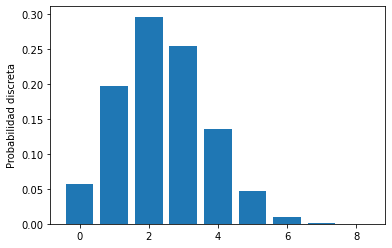

In [6]:
p = 0.3
n = 8

x = list(range(0, 9, 1))
y = []

for i in x:
    y.append(binom.pmf(i, p=p, n=n))

figure, axis = plt.subplots()
axis.bar(x, y)
axis.set_ylabel('Probabilidad discreta')

print(np.sum(y))

In [7]:
mean = np.average(x, weights=y)
variance = np.average(((x - mean) ** 2), weights=y)

print(f'The mean is {mean} and the variance is {variance}')

The mean is 2.4 and the variance is 1.68


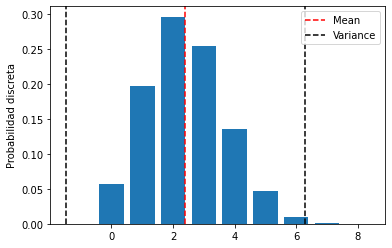

In [8]:
figure, axis = plt.subplots()
axis.bar(x, y)
axis.set_ylabel('Probabilidad discreta')
axis.axvline(x=mean, c='r', linestyle='--', label='Mean')
axis.axvline(x=(mean + 3*np.sqrt(variance)), c='k', linestyle='--', label='Variance')
axis.axvline(x=(mean - 3*np.sqrt(variance)), c='k', linestyle='--')
axis.legend()

Text(0.5, 1.0, 'probabilidad continua')

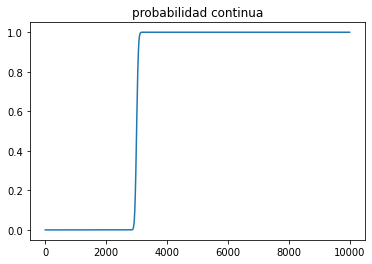

In [9]:
N = 10000

x = list(range(0, N+1, 1))
y = []

for i in x:
    y.append(binom.cdf(i, p=0.3, n=N))

figure, axis = plt.subplots()

axis.plot(x, y)
axis.set_title('probabilidad continua')

In [10]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(f'The mean is {mean}, the variance is {var}, the kurotsis is {kurt}, and the {skew}')

The mean is 0.0, the variance is 1.0, the kurotsis is 0.0, and the 0.0


In [11]:
from scipy.stats import bernoulli

p = 0.3
data = bernoulli.rvs(p, size=100)

In [12]:
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


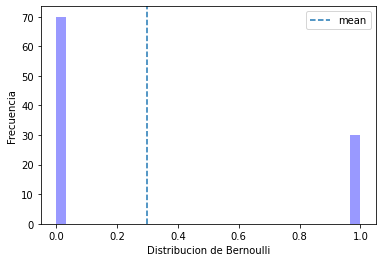

In [13]:
axis = sns.distplot(data, bins=30, kde=False, color='blue')
axis.set(xlabel='Distribucion de Bernoulli', ylabel='Frecuencia')
axis.axvline(x=mean, linestyle='--', label='mean')
axis.legend()

In [14]:
p = 0.3
n = 10
data = binom.rvs(p=p, n=n, size=100)

mean, var, skew, kurt = binom.stats(p=p, n=n, moments='mvsk')
mean, var, skew, kurt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

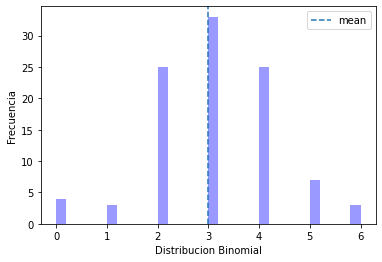

In [15]:
axis = sns.distplot(data, bins=30, kde=False, color='blue')
axis.set(xlabel='Distribucion Binomial', ylabel='Frecuencia')
axis.axvline(x=mean, linestyle='--', label='mean')
axis.legend()

In [16]:
p =0.3
n = 1
data = nbinom.rvs(p=p, n=n, size=100)
mean, var, skew, kurt = nbinom.stats(p=p, n=n, moments='mvsk')
mean, var, skew, kurt

(array(2.33333333), array(7.77777778), array(2.03188864), array(6.12857143))

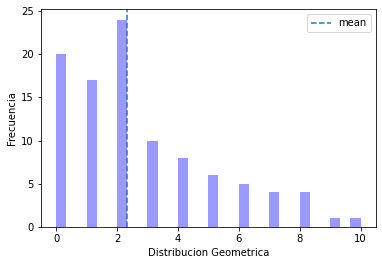

In [17]:
axis = sns.distplot(data, bins=30, kde=False, color='blue')
axis.set(xlabel='Distribucion Geometrica', ylabel='Frecuencia')
axis.axvline(x=mean, linestyle='--', label='mean')
axis.legend()

### Estandarización, covarianza y correlación

In [18]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_df = data1 = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= ['s_length', 's_width', 'p_length', 'p_width', 'target'])

In [19]:
iris_df

,s_length,s_width,p_length,p_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


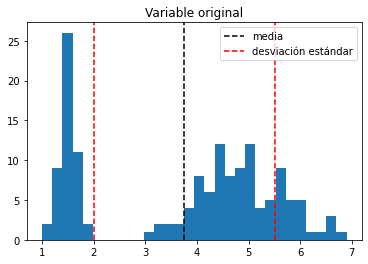

In [25]:
y = iris_df['p_length']

figure, axis = plt.subplots()
axis.hist(y, bins=30)
axis.set_title('Variable original')
axis.axvline(x=np.mean(y), c='k', label='media', linestyle='--')
axis.axvline(x=np.mean(y)+np.std(y), c='r', label='desviación estándar', linestyle='--')
axis.axvline(x=np.mean(y)-np.std(y), c='r', linestyle='--')
axis.legend()

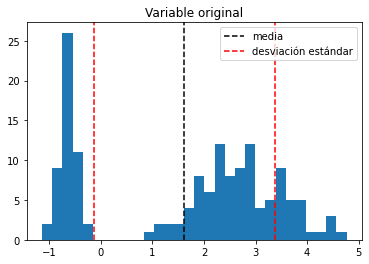

In [27]:
norm_values = y - np.mean(y) / np.std(y)
norm_mean = np.mean(norm_values)
sigma = np.std(norm_values)
sigma_plus = norm_mean + sigma
sigma_minus = norm_mean - sigma

figure, axis = plt.subplots()
axis.hist(norm_values, bins=30)
axis.set_title('Variable original')
axis.axvline(x=norm_mean, c='k', label='media', linestyle='--')
axis.axvline(x=sigma_plus, c='r', label='desviación estándar', linestyle='--')
axis.axvline(x=sigma_minus, c='r', linestyle='--')
axis.legend()

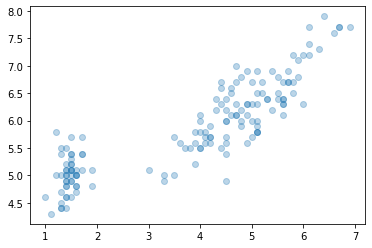

In [29]:
figure, axis = plt.subplots()
axis.scatter(iris_df['p_length'], iris_df['s_length'], alpha=0.3)

In [31]:
np.cov(iris_df['p_length'], iris_df['s_length'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [36]:
corr = iris_df.corr(method='spearman')

<AxesSubplot:>

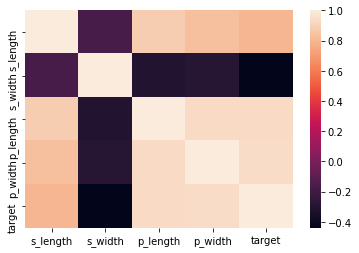

In [37]:
sns.heatmap(corr, xticklabels=iris_df.columns)